Deep Reinforcement Learning Agent with a Bassic nural network to learn Buy and Sell.
 

In [ ]:
import random
import numpy as np
from collections import deque
import tensorflow as tf
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.optimizers import Adam
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
batch_size = 64

In [ ]:
class DQNAgent:
    
    def __init__(self,state_size,action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_decay = 0.9995
        self.epsilon_min = 0.1
        self.learning_rate = 0.001
        self.model = self._build_model()
        
    def _build_model(self):
        
        model = Sequential()
        model.add(Dense(512, input_dim = self.state_size, activation = 'relu'))
        model.add(Dense(512, activation = 'relu'))
        model.add(Dense(512, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        model.compile(loss='mse',optimizer = Adam(lr = self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state):
        self.memory.append((state, action, reward, next_state))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
   
    def replay (self, batch_size):
        
        done = False
        minibatch = random.sample(self.memory, batch_size) 
        for (state, action, reward, next_state) in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            
            self.model.fit(state, target_f, epochs=1, verbose = 0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
    def save(self,name):                                                                                                 
        self.model.save(name)
    
    def load(self, name):
        new_model = tf.keras.models.load_model(name)

In [ ]:
df = pd.read_csv('FullData_new.csv')
X = df.drop(['Id1','Id','Date','Adj Close'],1)
# y = df['Label1']
X_test = np.array(X)
# y_test = np.array(df['Label1'])

In [ ]:
state_size = len(X_test[:][1])
action_size = 4
agent = DQNAgent(state_size,action_size)

Started..!
episode: 1/5000, score:-52308712.64500074, e: 1.0 , Win%: 44.52463912394226 %
episode: 2/5000, score:-53959472.99200066, e: 1.0 , Win%: 44.860267314702305 %
episode: 3/5000, score:-55793792.538000934, e: 1.0 , Win%: 43.74384236453202 %
episode: 4/5000, score:-53044947.04800075, e: 1.0 , Win%: 44.90049751243781 %
episode: 5/5000, score:3291777.6570000295, e: 1.0 , Win%: 54.77486392874815 %
episode: 6/5000, score:-57727255.111001045, e: 1.0 , Win%: 43.53192499406599 %
episode: 7/5000, score:3485294.3819999723, e: 1.0 , Win%: 55.111323916686615 %
episode: 8/5000, score:-58786794.71800099, e: 1.0 , Win%: 44.11139957517111 %
episode: 9/5000, score:3136347.5080000227, e: 1.0 , Win%: 55.7451078775715 %
episode: 10/5000, score:-55331714.279000945, e: 1.0 , Win%: 44.650358290091425 %
episode: 11/5000, score:3427003.513000026, e: 1.0 , Win%: 57.4866987585508 %
episode: 12/5000, score:-57779962.6460008, e: 0.99 , Win%: 43.35035254072453 %
episode: 13/5000, score:-53610170.219000906, e:

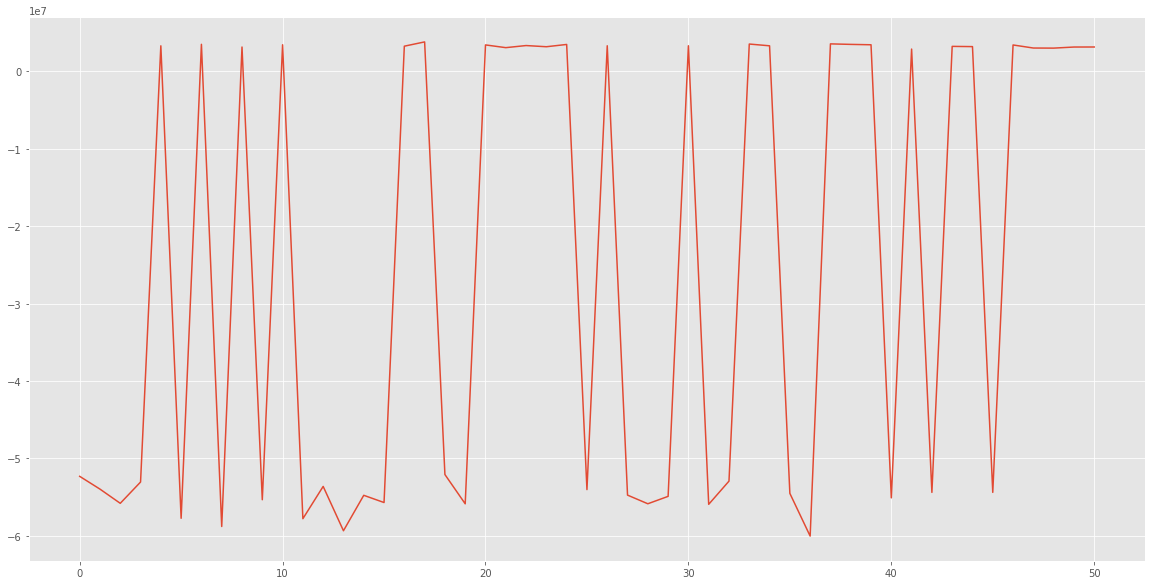

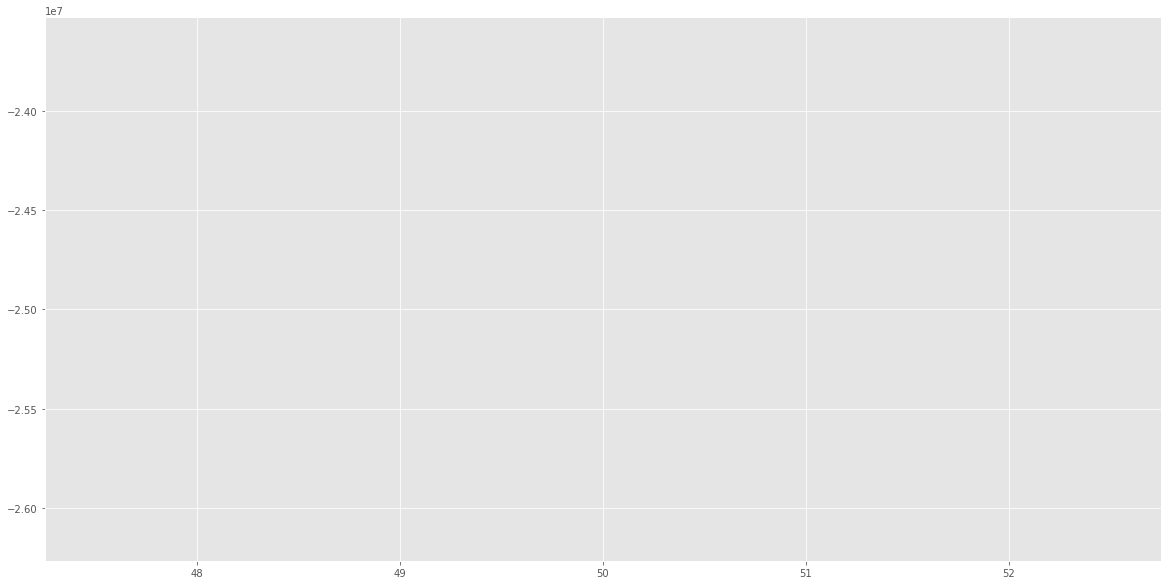

episode: 52/5000, score:3215273.7609999934, e: 0.97 , Win%: 55.061037639877924 %
episode: 53/5000, score:-52650691.99100093, e: 0.97 , Win%: 44.469812278031455 %
episode: 54/5000, score:-52371948.826000825, e: 0.97 , Win%: 43.19876574955001 %
episode: 55/5000, score:-55581881.24100077, e: 0.97 , Win%: 43.084300858152446 %
episode: 56/5000, score:3193578.2700000196, e: 0.97 , Win%: 56.12399193548387 %
episode: 57/5000, score:3047716.680999993, e: 0.97 , Win%: 55.832274459974585 %
episode: 58/5000, score:-54178205.50299925, e: 0.97 , Win%: 45.45229856648542 %
episode: 59/5000, score:3366026.71499999, e: 0.97 , Win%: 56.639364606602136 %
episode: 60/5000, score:-53599885.436000645, e: 0.97 , Win%: 43.67523542886231 %
episode: 61/5000, score:-60427542.93400094, e: 0.97 , Win%: 44.179714091218514 %
episode: 62/5000, score:-56757573.277000986, e: 0.97 , Win%: 44.189489267209474 %
episode: 63/5000, score:-54431890.80400095, e: 0.97 , Win%: 43.66590505204367 %
episode: 64/5000, score:3774467.5

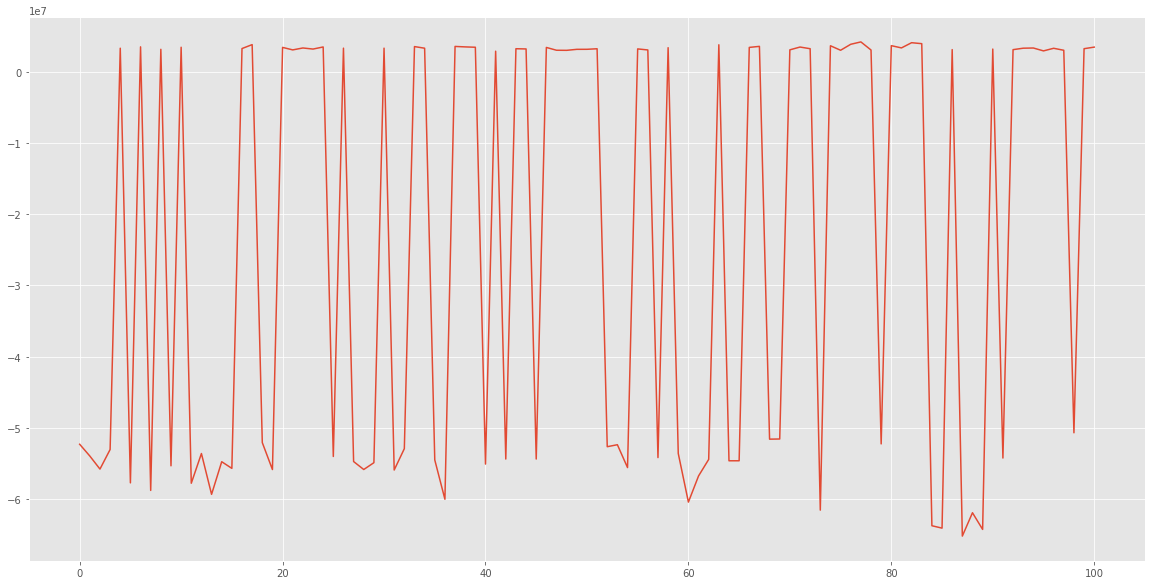

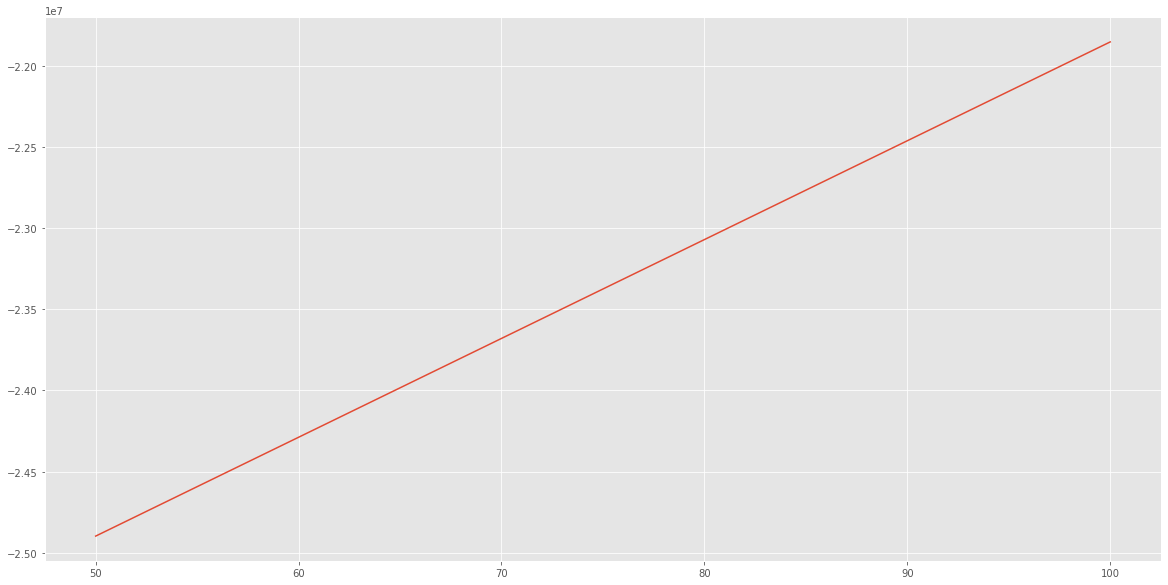

episode: 102/5000, score:3141586.3209999935, e: 0.95 , Win%: 55.71683218742042 %
episode: 103/5000, score:3024654.664000042, e: 0.95 , Win%: 55.08672016567434 %
episode: 104/5000, score:-51733286.35200097, e: 0.95 , Win%: 44.565782631305254 %
episode: 105/5000, score:-53537304.52300093, e: 0.95 , Win%: 43.44881479551967 %
episode: 106/5000, score:3222832.697999988, e: 0.95 , Win%: 55.82423296931877 %
episode: 107/5000, score:-53941051.62800083, e: 0.95 , Win%: 43.54005167958656 %
episode: 108/5000, score:-51933159.06899926, e: 0.95 , Win%: 43.648719289074755 %
episode: 109/5000, score:2955818.970999996, e: 0.95 , Win%: 55.31098029178398 %
episode: 110/5000, score:-51371748.986000605, e: 0.95 , Win%: 44.12156758197814 %
episode: 111/5000, score:2876143.7809999846, e: 0.95 , Win%: 54.46547587310051 %
episode: 112/5000, score:-52934992.39600084, e: 0.95 , Win%: 43.33948826167238 %
episode: 113/5000, score:-51862242.16500073, e: 0.95 , Win%: 44.47900466562986 %
episode: 114/5000, score:328

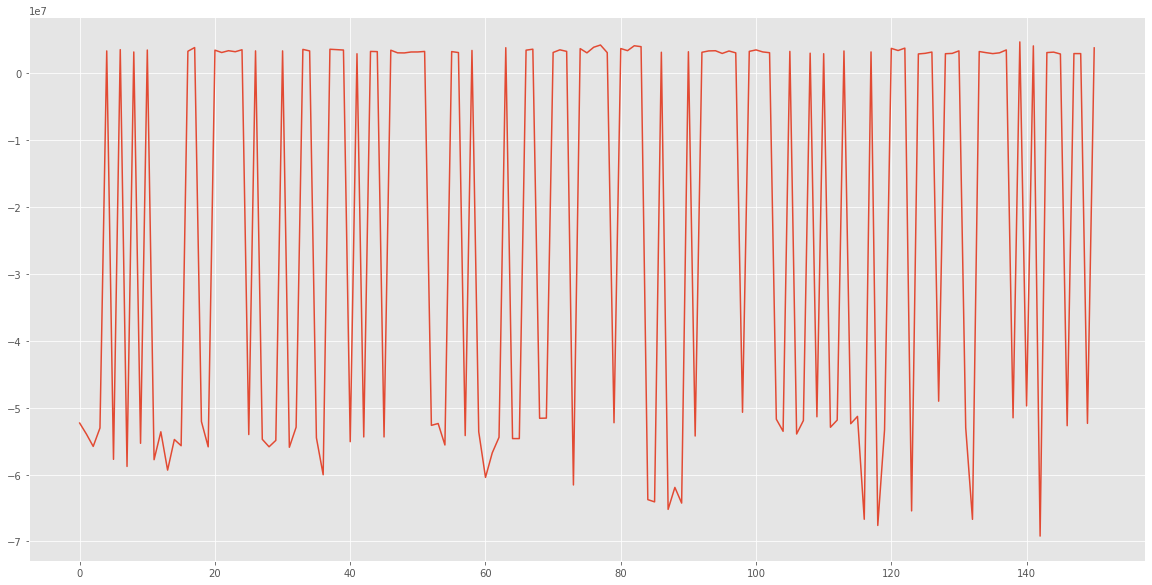

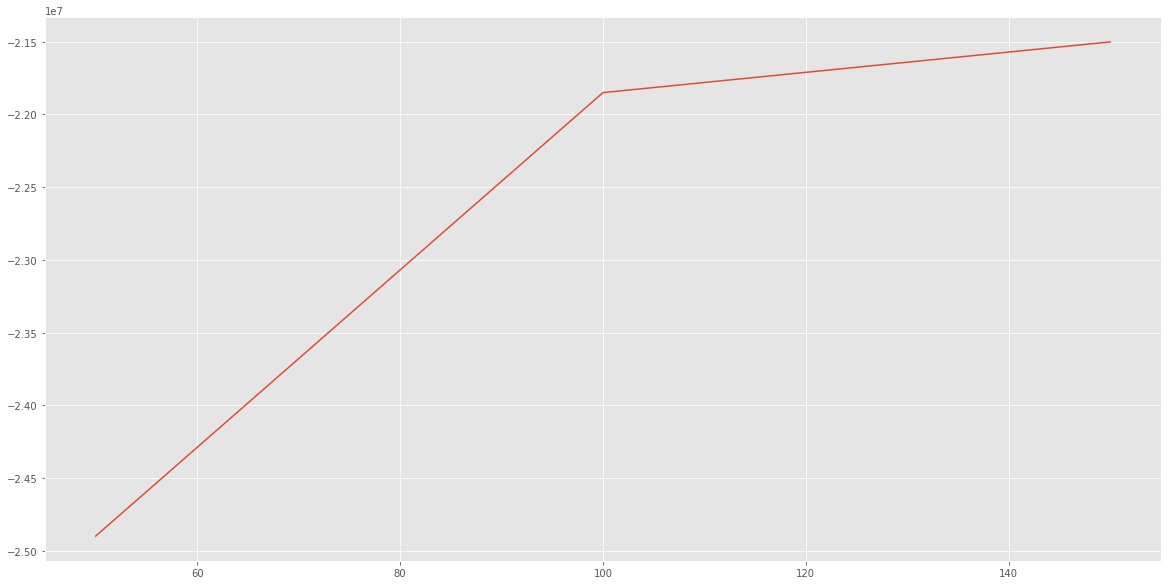

episode: 152/5000, score:-67784797.75900182, e: 0.93 , Win%: 43.49518541282524 %
episode: 153/5000, score:2813903.3800000297, e: 0.93 , Win%: 54.597851716007334 %
episode: 154/5000, score:3235568.1039999877, e: 0.93 , Win%: 56.23831151482768 %
episode: 155/5000, score:3026853.791999989, e: 0.93 , Win%: 55.796911803192884 %
episode: 156/5000, score:-51627029.92000089, e: 0.93 , Win%: 44.377139847247825 %
episode: 157/5000, score:2898605.6390000065, e: 0.92 , Win%: 55.532304472927024 %
episode: 158/5000, score:-69420927.9480016, e: 0.92 , Win%: 45.087272014120416 %
episode: 159/5000, score:-53226766.305000894, e: 0.92 , Win%: 42.58767268862912 %
episode: 160/5000, score:-51394527.97599938, e: 0.92 , Win%: 43.53004872766649 %
episode: 161/5000, score:-51735968.93400077, e: 0.92 , Win%: 45.00534188034188 %
episode: 162/5000, score:-53637373.12500077, e: 0.92 , Win%: 44.33862433862434 %
episode: 163/5000, score:-50649864.582000785, e: 0.92 , Win%: 43.959282078757035 %
episode: 164/5000, sco

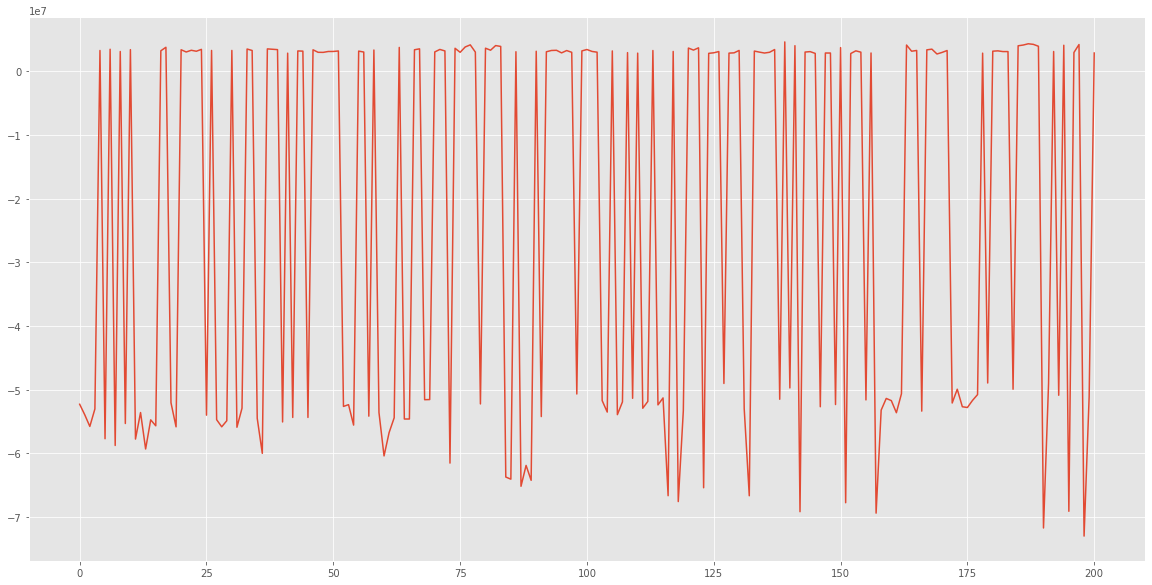

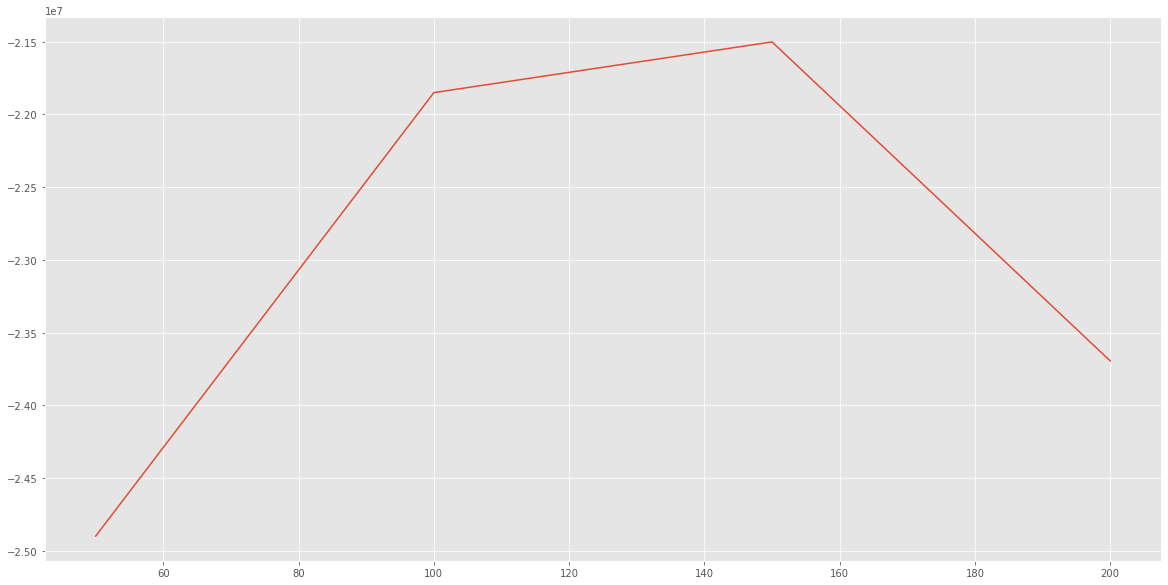

episode: 202/5000, score:-53135933.123000816, e: 0.9 , Win%: 42.98410988419068 %
episode: 203/5000, score:-49430847.62300073, e: 0.9 , Win%: 43.61065796628603 %
episode: 204/5000, score:4343932.103999984, e: 0.9 , Win%: 56.360189573459714 %
episode: 205/5000, score:-72945492.95600106, e: 0.9 , Win%: 44.73535505744962 %
episode: 206/5000, score:-50844520.43100067, e: 0.9 , Win%: 44.56697149004842 %
episode: 207/5000, score:-50931402.71300082, e: 0.9 , Win%: 43.799616753353405 %
episode: 208/5000, score:2958523.605000028, e: 0.9 , Win%: 55.03392130257802 %
episode: 209/5000, score:3029327.0959999966, e: 0.9 , Win%: 55.40862205765671 %
episode: 210/5000, score:3193816.810000004, e: 0.9 , Win%: 58.29926410466067 %
episode: 211/5000, score:2940728.0379999964, e: 0.9 , Win%: 55.27624309392265 %
episode: 212/5000, score:-51899865.80600068, e: 0.9 , Win%: 43.136736313144674 %
episode: 213/5000, score:4631448.057999919, e: 0.9 , Win%: 56.223255813953486 %
episode: 214/5000, score:-76110604.2130

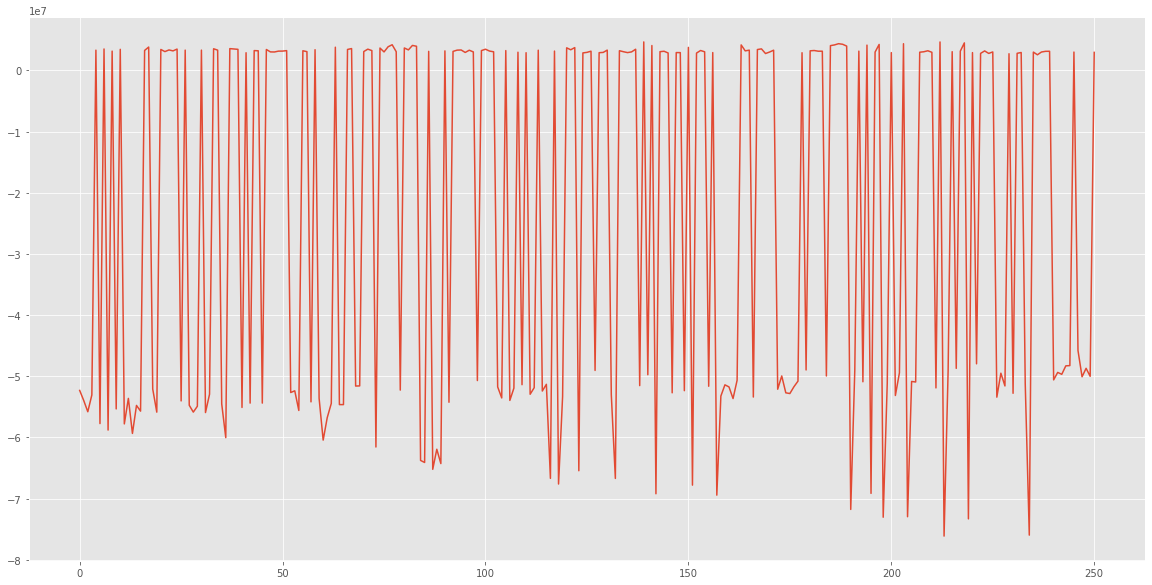

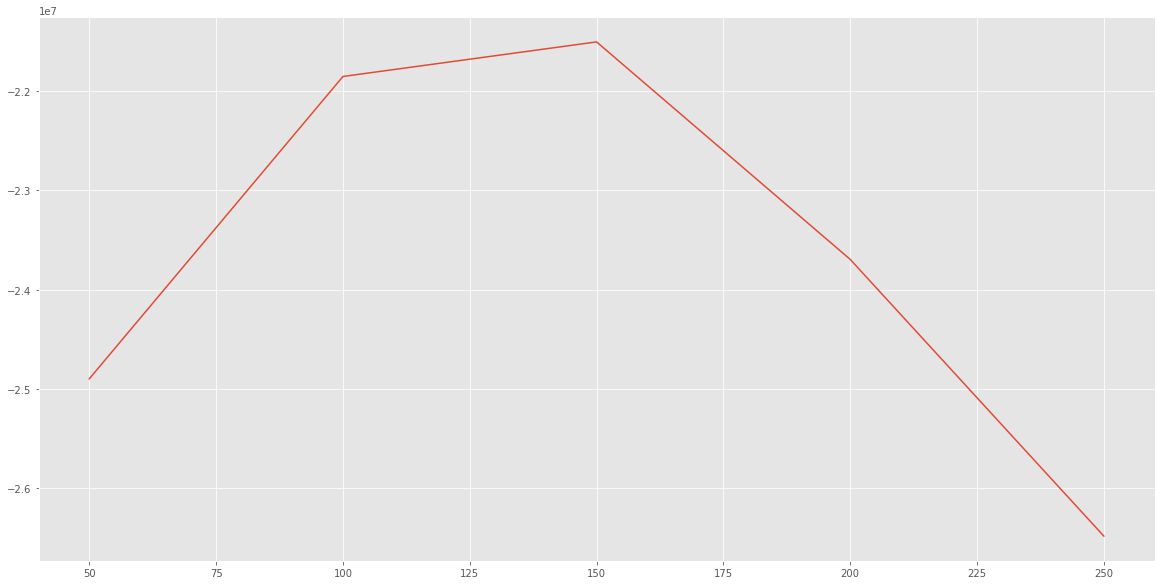

episode: 252/5000, score:2605729.267000004, e: 0.88 , Win%: 54.83328663491174 %
episode: 253/5000, score:-47964517.046000615, e: 0.88 , Win%: 43.02162313956754 %
episode: 254/5000, score:2611995.1470000027, e: 0.88 , Win%: 55.43355855855856 %
episode: 255/5000, score:-50769354.0450008, e: 0.88 , Win%: 44.843537414965986 %
episode: 256/5000, score:-75275056.53900158, e: 0.88 , Win%: 43.95424836601307 %
episode: 257/5000, score:-49296747.41200074, e: 0.88 , Win%: 44.6978021978022 %
episode: 258/5000, score:-49562926.881000794, e: 0.88 , Win%: 44.57998336567785 %
episode: 259/5000, score:2763797.070999991, e: 0.88 , Win%: 55.53387231669919 %
episode: 260/5000, score:2713953.941000042, e: 0.88 , Win%: 55.15391132448461 %
episode: 261/5000, score:-48943494.87400075, e: 0.88 , Win%: 44.40677966101695 %
episode: 262/5000, score:2592266.6710000373, e: 0.88 , Win%: 56.11656087709175 %
episode: 263/5000, score:-49567143.363000736, e: 0.88 , Win%: 42.93000850099178 %
episode: 264/5000, score:4455

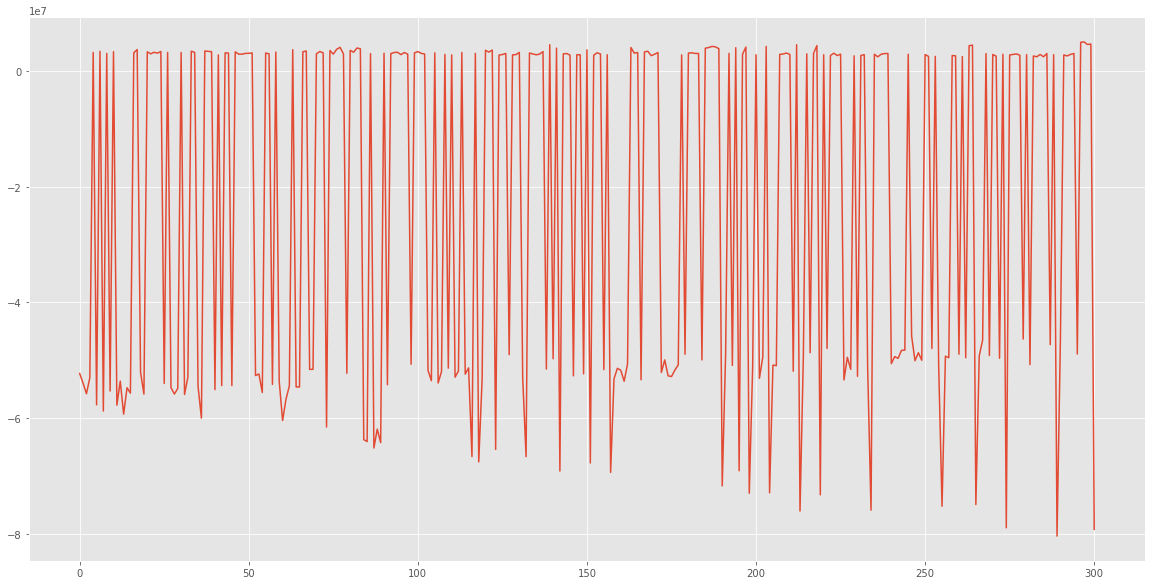

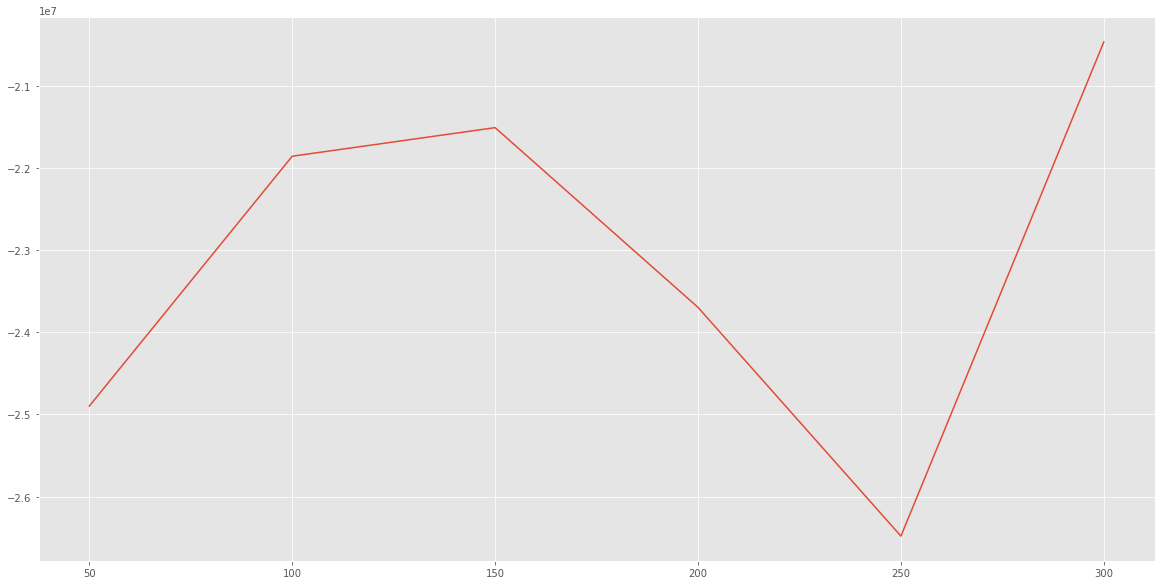

episode: 302/5000, score:4869776.570999905, e: 0.86 , Win%: 55.83461472749018 %
episode: 303/5000, score:-80356682.85500178, e: 0.86 , Win%: 44.508377051954646 %
episode: 304/5000, score:3027767.982999967, e: 0.86 , Win%: 55.68627450980392 %
episode: 305/5000, score:-46161486.51900056, e: 0.86 , Win%: 45.16776598795526 %
episode: 306/5000, score:2906009.4680000073, e: 0.86 , Win%: 56.03324734881055 %
episode: 307/5000, score:-47315373.963000625, e: 0.86 , Win%: 45.109321058688145 %
episode: 308/5000, score:-49890934.65000049, e: 0.86 , Win%: 43.9569770733088 %
episode: 309/5000, score:-78908005.08500196, e: 0.86 , Win%: 44.28177747158112 %
episode: 310/5000, score:-46122673.2850003, e: 0.86 , Win%: 44.899689177733826 %
episode: 311/5000, score:2672255.526000002, e: 0.86 , Win%: 55.67890691716482 %
episode: 312/5000, score:2664215.4070000076, e: 0.86 , Win%: 56.68495524112041 %
episode: 313/5000, score:-45116146.76800028, e: 0.86 , Win%: 44.170017231476166 %
episode: 314/5000, score:277

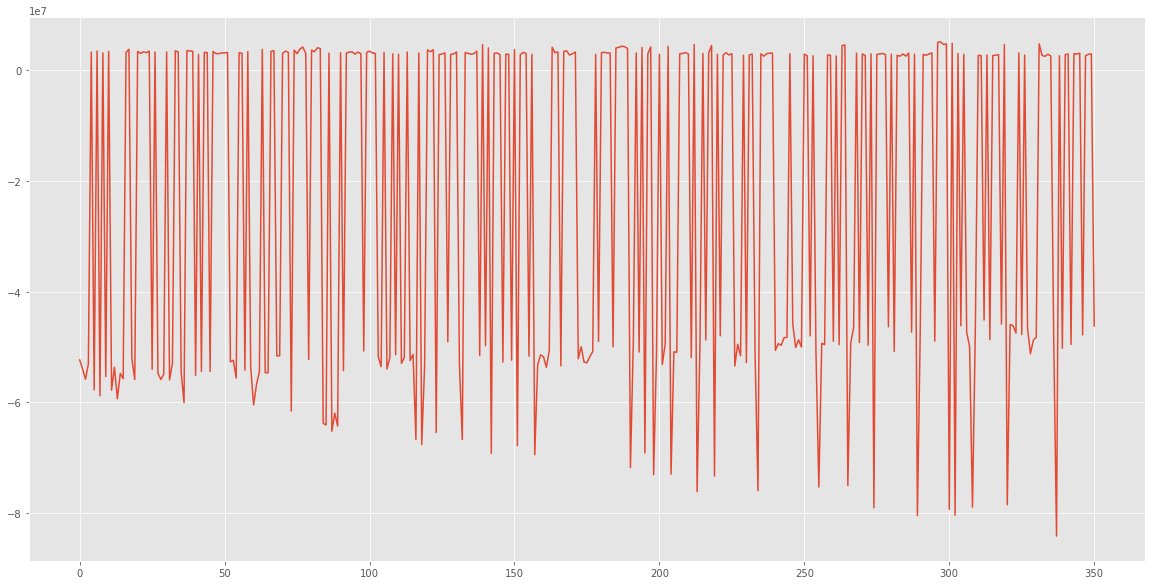

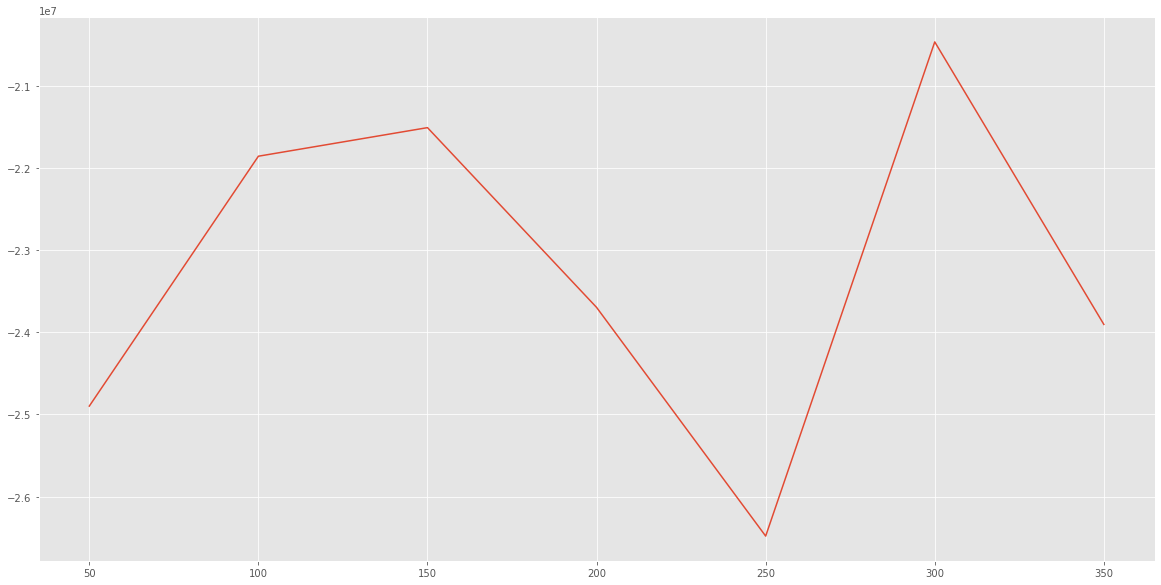

episode: 352/5000, score:-46731468.41100064, e: 0.84 , Win%: 44.091303091592025 %
episode: 353/5000, score:2677711.5959999687, e: 0.84 , Win%: 55.790108564535586 %
episode: 354/5000, score:2570146.947000034, e: 0.84 , Win%: 54.07624633431085 %
episode: 355/5000, score:3004821.2679999922, e: 0.84 , Win%: 56.05885747259088 %
episode: 356/5000, score:2813528.856000008, e: 0.84 , Win%: 56.28776978417266 %
episode: 357/5000, score:2730891.2680000057, e: 0.84 , Win%: 55.863288155568654 %
episode: 358/5000, score:2743621.532000028, e: 0.84 , Win%: 55.88747099767981 %
episode: 359/5000, score:-45692702.53000068, e: 0.84 , Win%: 43.57394366197183 %
episode: 360/5000, score:-46021217.41800062, e: 0.84 , Win%: 44.589498114302295 %
episode: 361/5000, score:-48856207.70000062, e: 0.84 , Win%: 44.733044733044736 %
episode: 362/5000, score:-86055562.25999929, e: 0.83 , Win%: 43.387622149837135 %
episode: 363/5000, score:3053754.3180000014, e: 0.83 , Win%: 57.814782354659656 %
episode: 364/5000, score

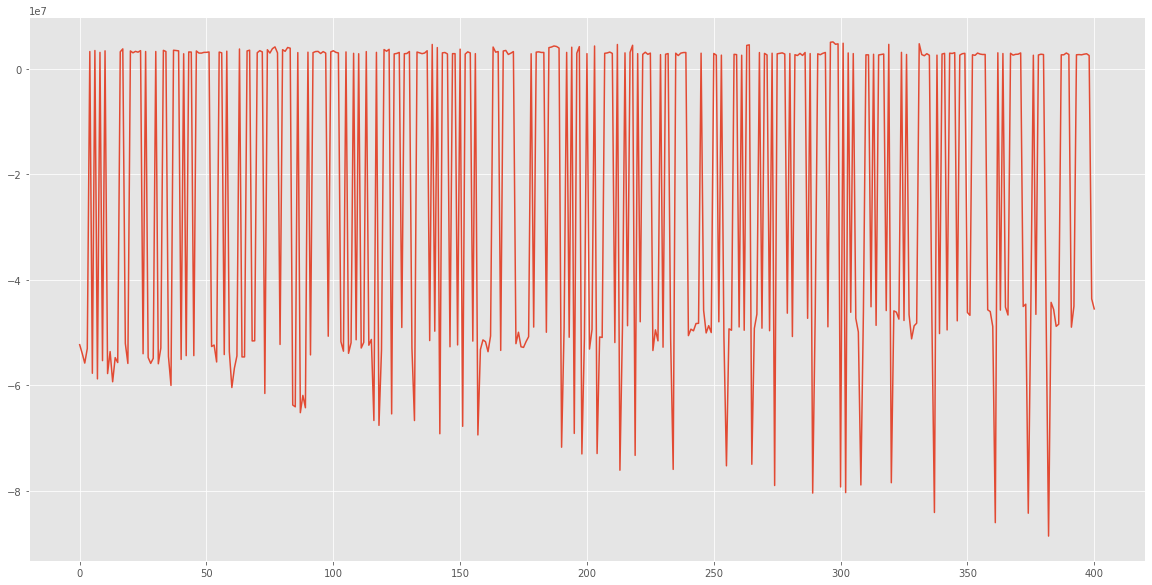

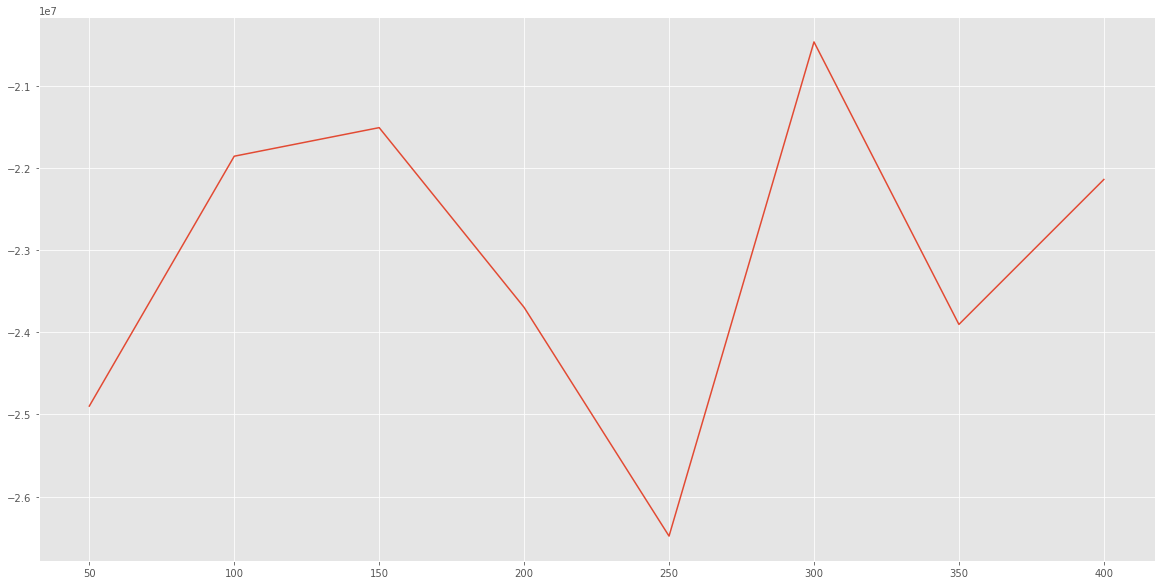

episode: 402/5000, score:-45519787.87600057, e: 0.82 , Win%: 44.72271914132379 %
episode: 403/5000, score:2835545.483000026, e: 0.82 , Win%: 57.26495726495727 %
episode: 404/5000, score:2780146.222999995, e: 0.82 , Win%: 56.375838926174495 %
episode: 405/5000, score:-48775764.24000065, e: 0.82 , Win%: 44.358669833729216 %
episode: 406/5000, score:2677982.4680000036, e: 0.82 , Win%: 55.18364928909953 %
episode: 407/5000, score:-44643930.81000053, e: 0.82 , Win%: 43.92240072749318 %
episode: 408/5000, score:2988920.707000001, e: 0.82 , Win%: 56.98340874811463 %
episode: 409/5000, score:2590344.1970000104, e: 0.82 , Win%: 55.33115533115533 %
episode: 410/5000, score:-45191261.152000226, e: 0.82 , Win%: 44.37046004842615 %
episode: 411/5000, score:-45287085.31600062, e: 0.81 , Win%: 43.784895680282105 %
episode: 412/5000, score:4922962.390999892, e: 0.81 , Win%: 55.569741461857646 %
episode: 413/5000, score:5448895.831999887, e: 0.81 , Win%: 56.66350110794555 %
episode: 414/5000, score:513

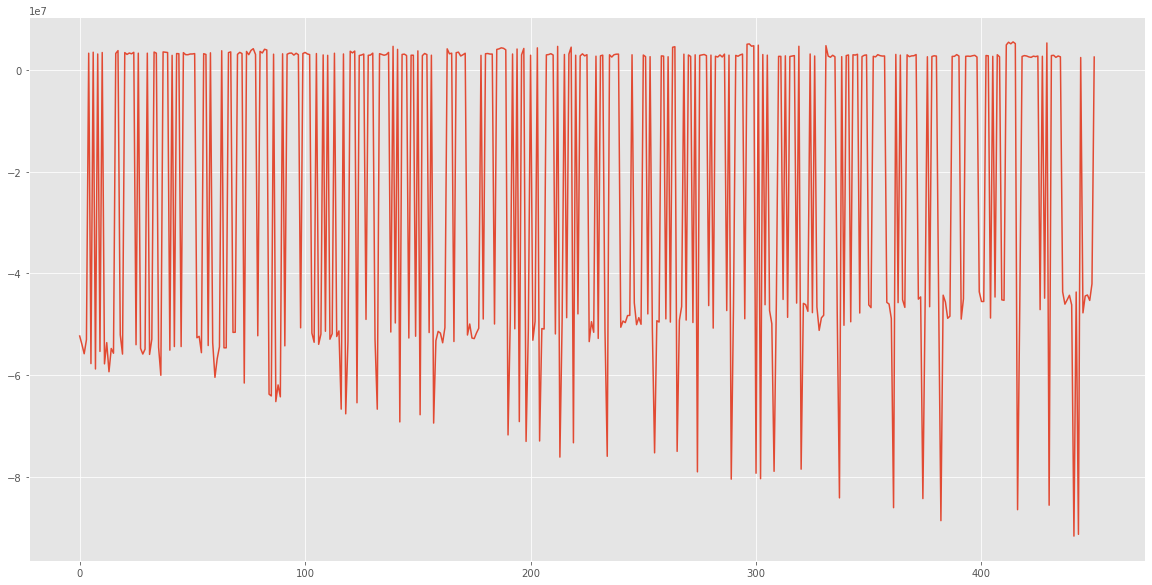

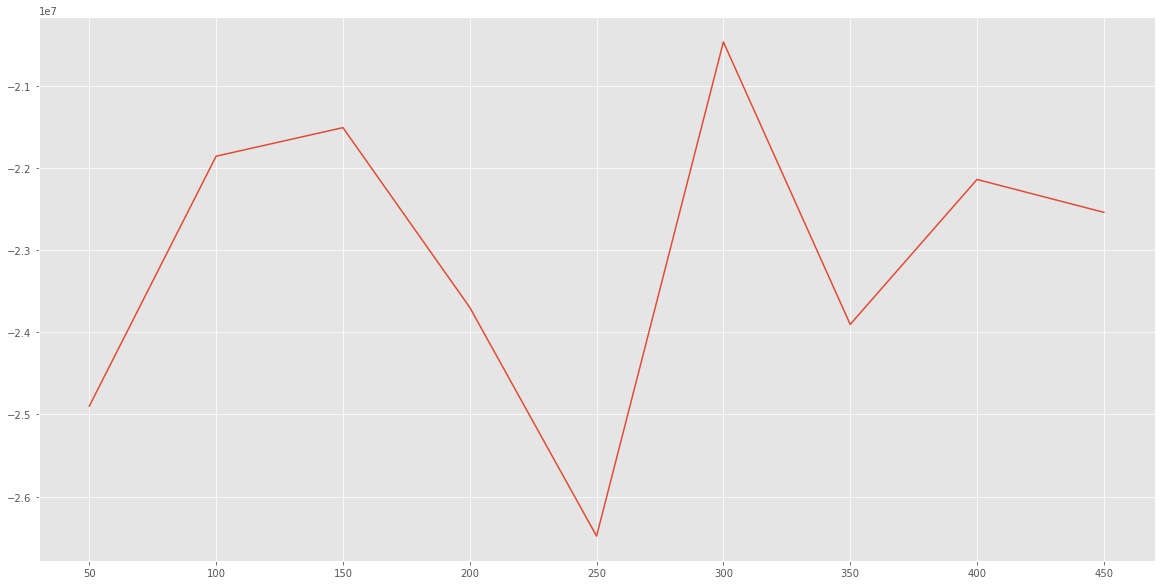

episode: 452/5000, score:2619727.572000007, e: 0.8 , Win%: 55.77395577395578 %
episode: 453/5000, score:-45478310.32800069, e: 0.8 , Win%: 44.51182534869618 %
episode: 454/5000, score:2822333.2740000007, e: 0.8 , Win%: 56.1890243902439 %
episode: 455/5000, score:-44892336.19000063, e: 0.8 , Win%: 44.38356164383562 %
episode: 456/5000, score:-42299905.63000058, e: 0.8 , Win%: 47.19101123595506 %
episode: 457/5000, score:5459773.0209999, e: 0.8 , Win%: 56.71022290545734 %
episode: 458/5000, score:-89176461.05000214, e: 0.8 , Win%: 45.402558314522196 %
episode: 459/5000, score:2788910.038999995, e: 0.8 , Win%: 57.208872458410355 %
episode: 460/5000, score:2567190.856000023, e: 0.79 , Win%: 55.154639175257735 %
episode: 461/5000, score:-45267873.62300023, e: 0.79 , Win%: 42.76788503592627 %
episode: 462/5000, score:5267605.616999918, e: 0.79 , Win%: 55.61847988077496 %
episode: 463/5000, score:-88511287.69299929, e: 0.79 , Win%: 44.76407914764079 %
episode: 464/5000, score:-46422910.745000

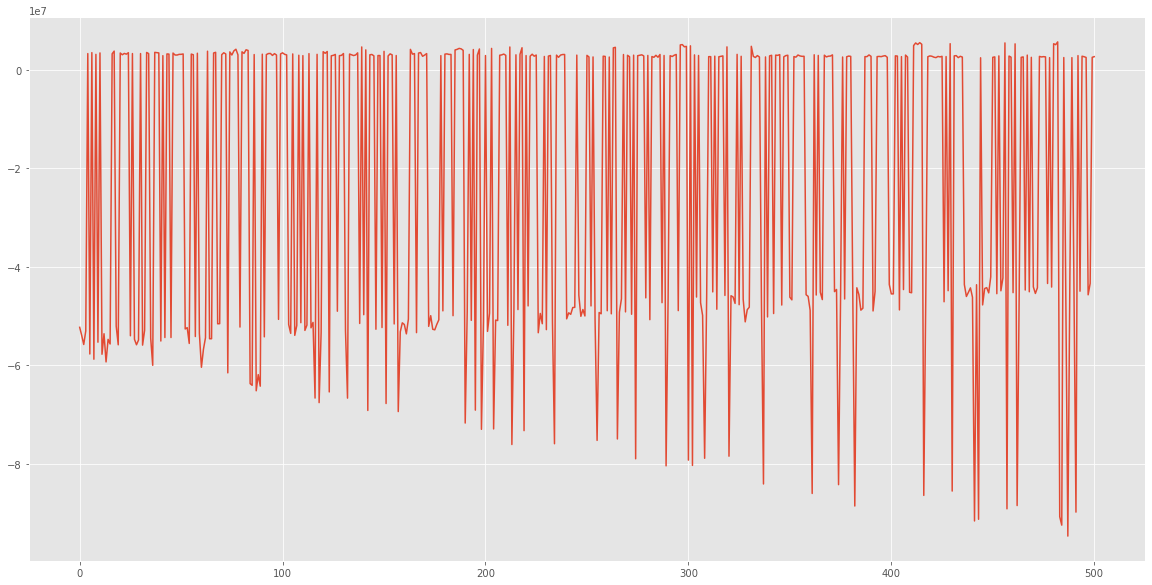

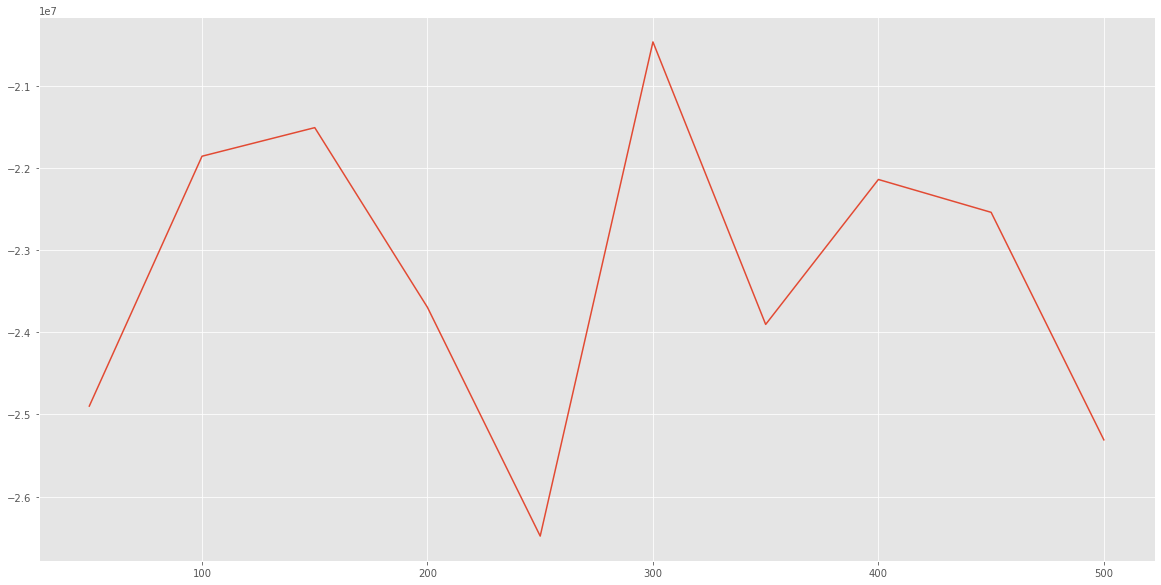

episode: 502/5000, score:-44652406.43700028, e: 0.78 , Win%: 44.19035846724351 %
episode: 503/5000, score:-91518918.41300227, e: 0.78 , Win%: 44.46450060168472 %
episode: 504/5000, score:-42983882.01800057, e: 0.78 , Win%: 45.073891625615765 %
episode: 505/5000, score:-43466832.2450006, e: 0.78 , Win%: 43.67488931056293 %
episode: 506/5000, score:5083851.245999891, e: 0.78 , Win%: 55.19270373639306 %
episode: 507/5000, score:-92345737.03699788, e: 0.78 , Win%: 43.6085718567361 %
episode: 508/5000, score:-96173833.53100306, e: 0.78 , Win%: 43.93390346427019 %
episode: 509/5000, score:2670341.566000006, e: 0.78 , Win%: 56.99647774575728 %
episode: 510/5000, score:2473018.1020000014, e: 0.78 , Win%: 56.41838351822504 %
episode: 511/5000, score:2478140.190000006, e: 0.77 , Win%: 55.54850982878884 %
episode: 512/5000, score:2751870.7160000005, e: 0.77 , Win%: 56.72162333544705 %
episode: 513/5000, score:2644794.8390000146, e: 0.77 , Win%: 55.47536868528397 %
episode: 514/5000, score:2577242

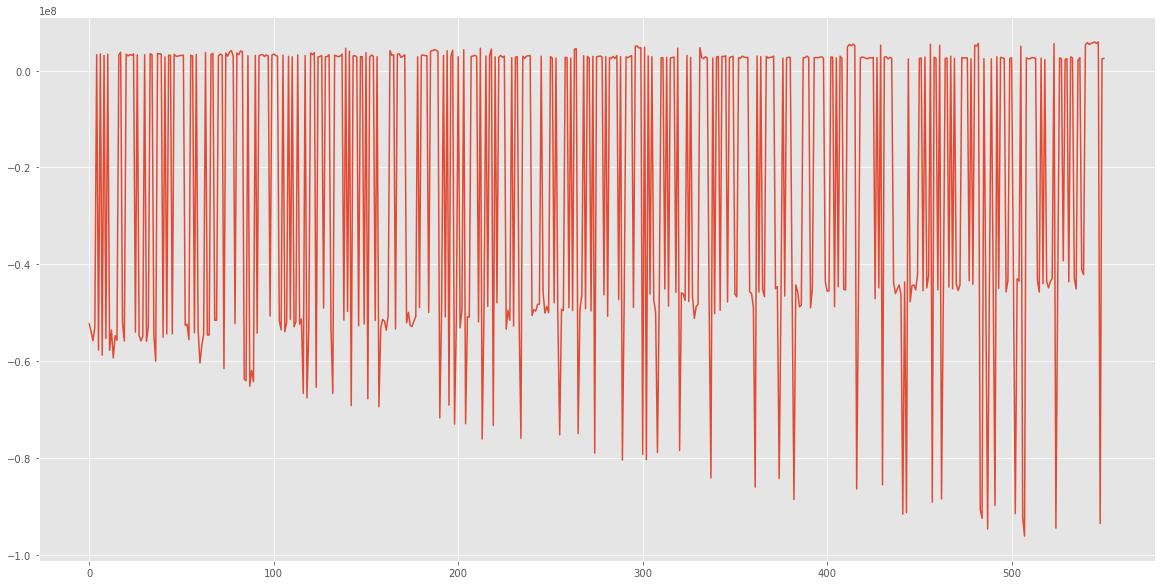

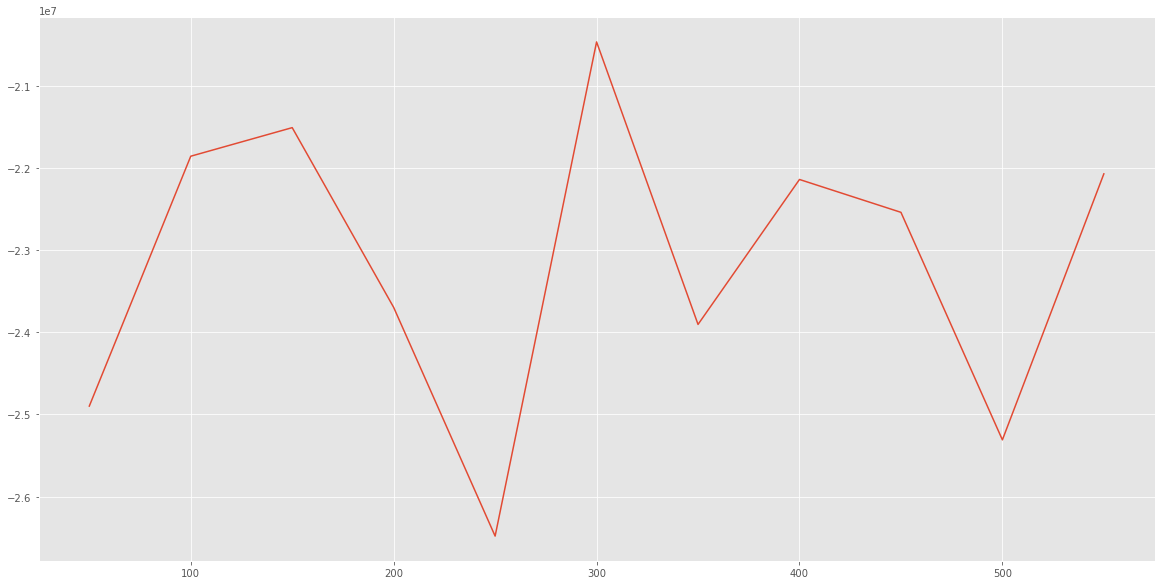

episode: 552/5000, score:2490562.335000002, e: 0.76 , Win%: 55.37720706260032 %
episode: 553/5000, score:2642132.1990000033, e: 0.76 , Win%: 58.391031981536436 %
episode: 554/5000, score:-41660203.447000496, e: 0.76 , Win%: 44.673202614379086 %
episode: 555/5000, score:-40835678.68500063, e: 0.76 , Win%: 46.082507195394946 %
episode: 556/5000, score:2560467.703000005, e: 0.76 , Win%: 56.11353711790393 %
episode: 557/5000, score:-43904448.47600057, e: 0.76 , Win%: 42.97680412371134 %
episode: 558/5000, score:2562460.984999999, e: 0.76 , Win%: 55.53812362723564 %
episode: 559/5000, score:-45230872.00600068, e: 0.76 , Win%: 42.51796313651984 %
episode: 560/5000, score:-42805536.112999745, e: 0.76 , Win%: 44.19642857142857 %
episode: 561/5000, score:6048687.739000021, e: 0.76 , Win%: 56.294736842105266 %
episode: 562/5000, score:-97267626.17699763, e: 0.76 , Win%: 44.017995220019685 %
episode: 563/5000, score:2567867.886999993, e: 0.75 , Win%: 56.44951140065147 %
episode: 564/5000, score:2

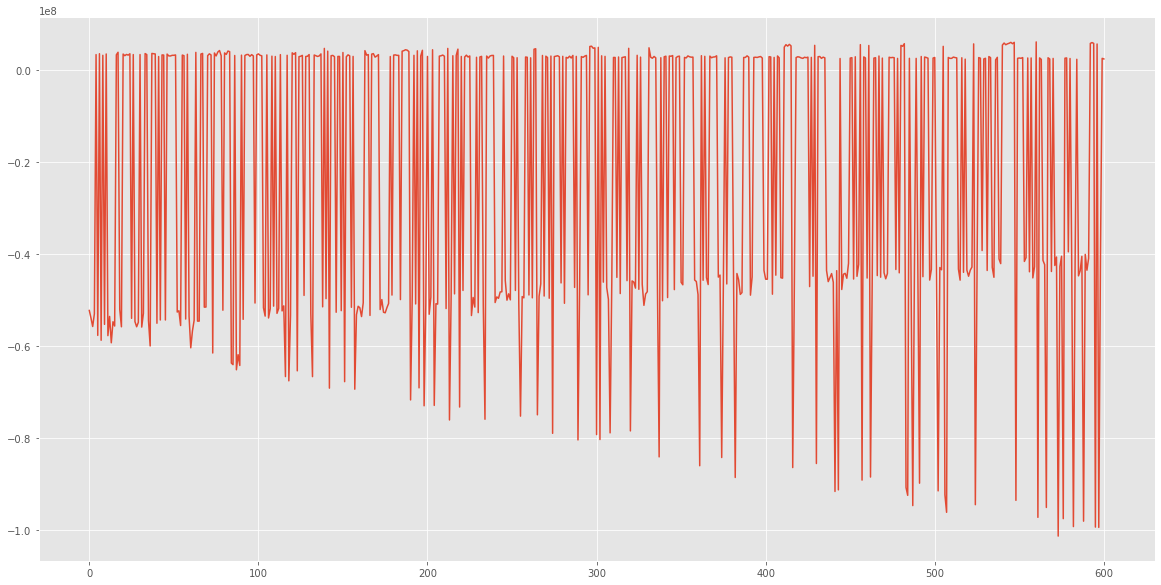

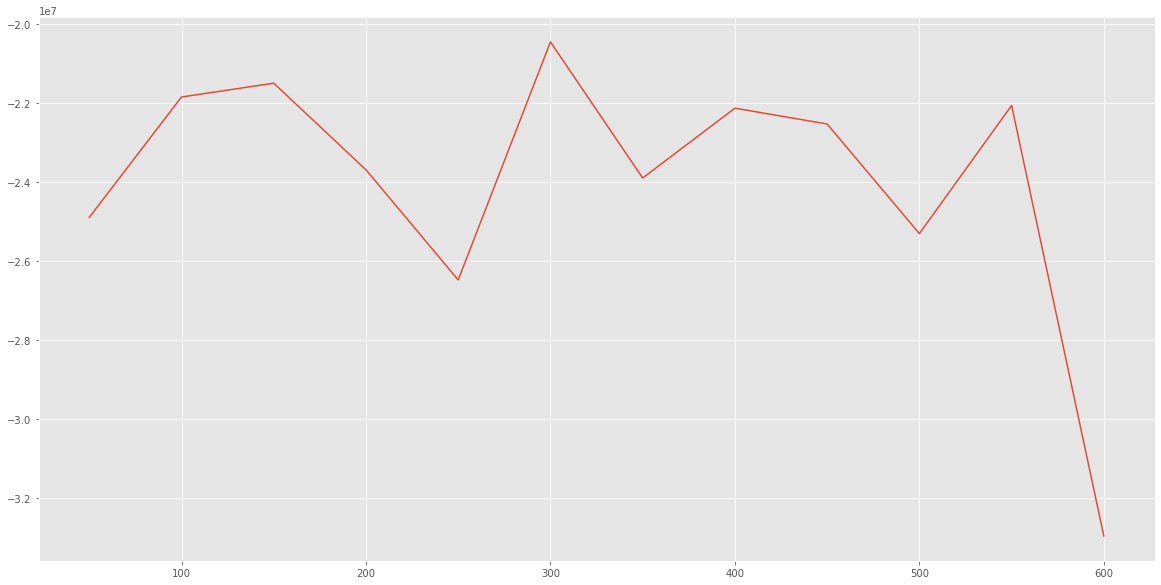

episode: 602/5000, score:-43364876.90700032, e: 0.74 , Win%: 43.73962138824311 %
episode: 603/5000, score:2375798.4849999994, e: 0.74 , Win%: 56.504727746984024 %
episode: 604/5000, score:-39874203.37200043, e: 0.74 , Win%: 45.9 %
episode: 605/5000, score:2384265.485000003, e: 0.74 , Win%: 56.14754098360656 %
episode: 606/5000, score:-39812427.971000016, e: 0.74 , Win%: 46.430953969312874 %
episode: 607/5000, score:-41002511.009000435, e: 0.74 , Win%: 45.34692535350214 %
episode: 608/5000, score:5944022.829999986, e: 0.74 , Win%: 56.20699146710707 %
episode: 609/5000, score:-101424915.03899671, e: 0.74 , Win%: 42.66848196051736 %
episode: 610/5000, score:2578892.2780000037, e: 0.74 , Win%: 56.08177172061329 %
episode: 611/5000, score:2309381.160000028, e: 0.74 , Win%: 55.095222185098564 %
episode: 612/5000, score:-40785611.9920005, e: 0.74 , Win%: 44.6843310435067 %
episode: 613/5000, score:2435204.180000008, e: 0.74 , Win%: 54.632377184305966 %
episode: 614/5000, score:2136464.0469999

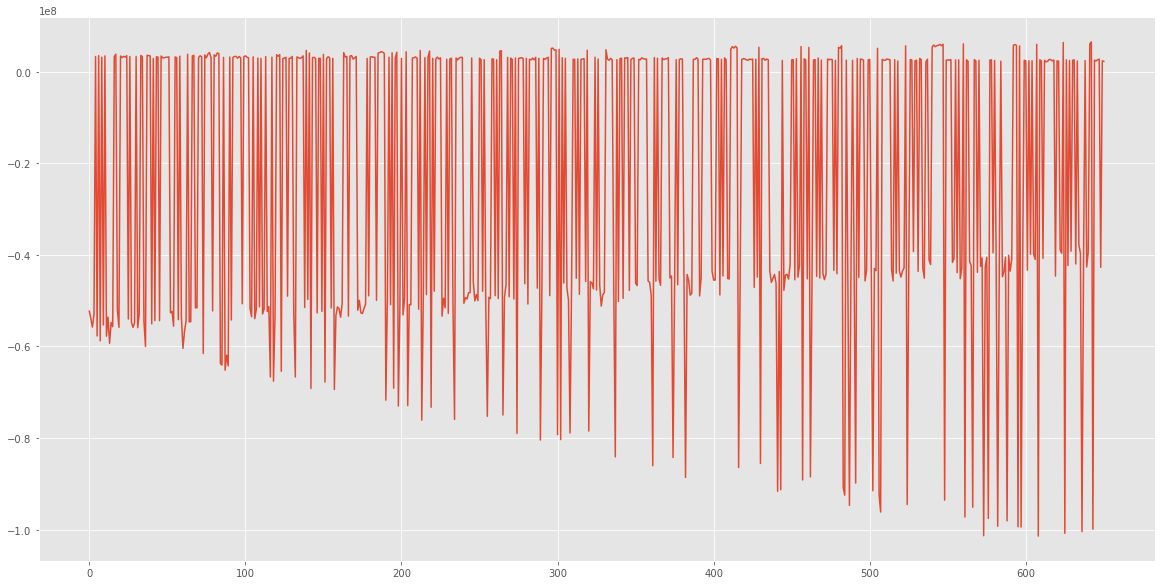

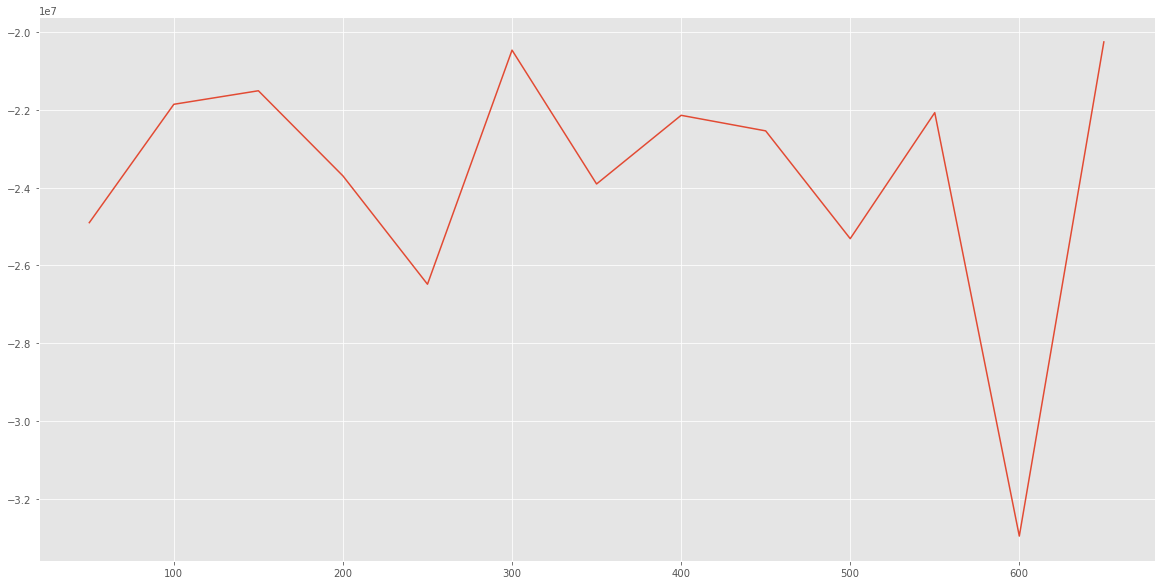

episode: 652/5000, score:2346249.787999998, e: 0.72 , Win%: 56.05182407091715 %
episode: 653/5000, score:2577931.728000004, e: 0.72 , Win%: 55.919055649241145 %
episode: 654/5000, score:2449757.3730000006, e: 0.72 , Win%: 56.57142857142857 %
episode: 655/5000, score:2156262.6450000033, e: 0.72 , Win%: 54.599303135888505 %
episode: 656/5000, score:2250401.1499999985, e: 0.72 , Win%: 56.167706167706164 %
episode: 657/5000, score:2489630.606000028, e: 0.72 , Win%: 56.9811320754717 %
episode: 658/5000, score:2177272.8130000224, e: 0.72 , Win%: 54.22012153950034 %
episode: 659/5000, score:-38901193.487000406, e: 0.72 , Win%: 43.87312186978297 %
episode: 660/5000, score:2354385.666999997, e: 0.72 , Win%: 56.06112054329372 %
episode: 661/5000, score:-39462152.74399991, e: 0.72 , Win%: 44.97950819672131 %
episode: 662/5000, score:-37881097.35200044, e: 0.72 , Win%: 45.41079408731523 %
episode: 663/5000, score:-39260216.30800035, e: 0.72 , Win%: 44.0897930550684 %
episode: 664/5000, score:-1050

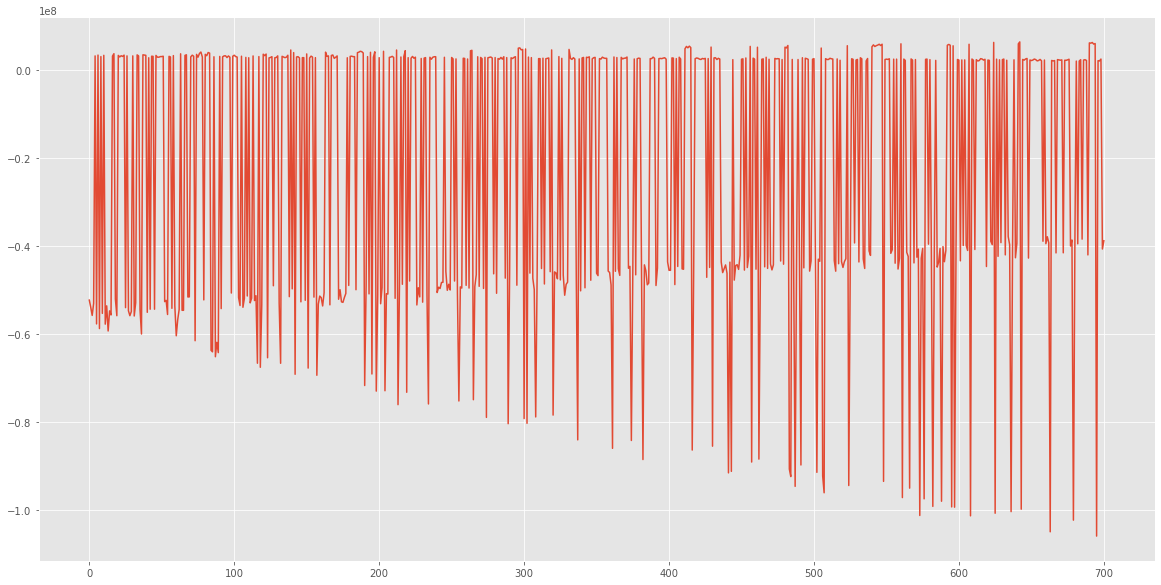

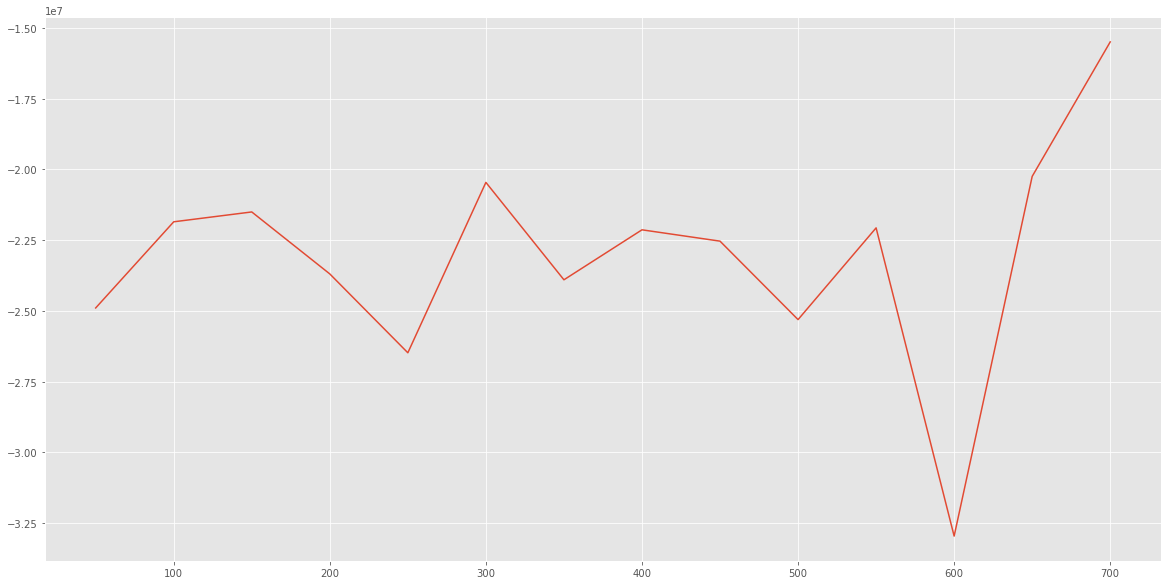

episode: 702/5000, score:-37865544.382000424, e: 0.7 , Win%: 45.281054823039554 %
episode: 703/5000, score:-108251831.3010035, e: 0.7 , Win%: 43.909312155757654 %
episode: 704/5000, score:-38364491.02000047, e: 0.7 , Win%: 43.731988472622476 %
episode: 705/5000, score:2374215.419999997, e: 0.7 , Win%: 53.947814300237205 %
episode: 706/5000, score:2255318.5300000035, e: 0.7 , Win%: 55.352839931153184 %
episode: 707/5000, score:2383581.7610000186, e: 0.7 , Win%: 56.10093328724508 %
episode: 708/5000, score:2171401.123000008, e: 0.7 , Win%: 55.59502664298402 %
episode: 709/5000, score:2307765.302000019, e: 0.7 , Win%: 55.44794188861985 %
episode: 710/5000, score:2295942.494000002, e: 0.7 , Win%: 54.87762840399862 %
episode: 711/5000, score:2505412.485000024, e: 0.7 , Win%: 55.92747559274756 %
episode: 712/5000, score:2334918.0030000014, e: 0.7 , Win%: 54.99488578247528 %
episode: 713/5000, score:-38876652.7870004, e: 0.7 , Win%: 43.91014391014391 %
episode: 714/5000, score:2497100.3390000

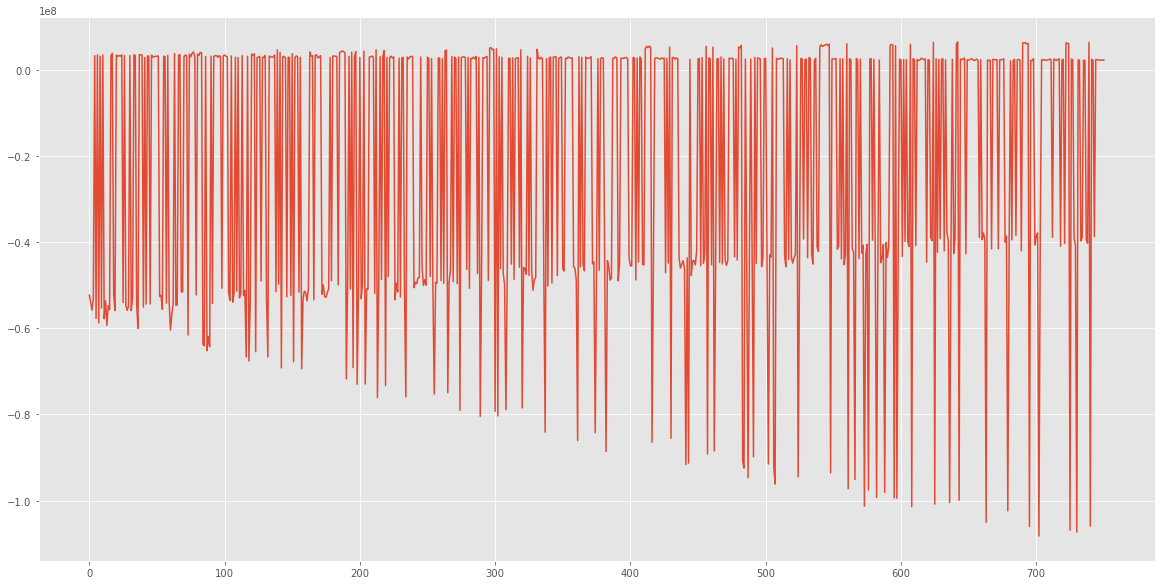

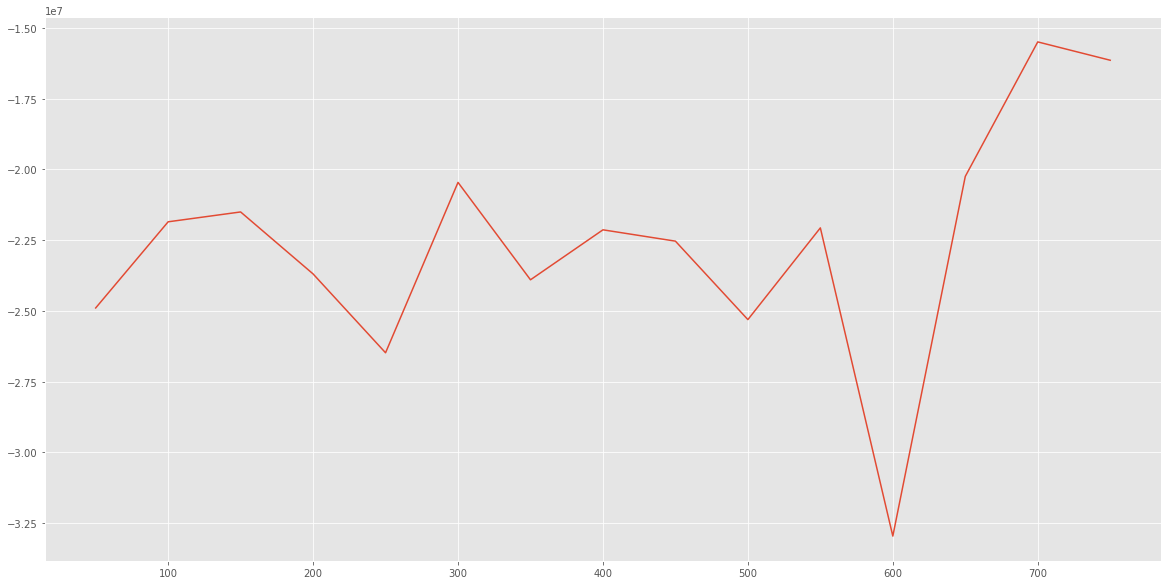

episode: 752/5000, score:-40401011.67600037, e: 0.69 , Win%: 42.059463379260336 %
episode: 753/5000, score:2240501.377000013, e: 0.69 , Win%: 55.586690017513135 %
episode: 754/5000, score:2372214.7260000086, e: 0.69 , Win%: 55.683003128258605 %
episode: 755/5000, score:2240000.1699999957, e: 0.69 , Win%: 55.75953923686105 %
episode: 756/5000, score:-39828499.8670005, e: 0.69 , Win%: 43.63376251788269 %
episode: 757/5000, score:2242308.7240000283, e: 0.69 , Win%: 55.21385648639095 %
episode: 758/5000, score:2377904.457000004, e: 0.68 , Win%: 56.17154811715481 %
episode: 759/5000, score:2322197.965000025, e: 0.68 , Win%: 56.15550755939525 %
episode: 760/5000, score:2207409.04000001, e: 0.68 , Win%: 56.704707560627675 %
episode: 761/5000, score:2134312.668000005, e: 0.68 , Win%: 54.386590584878746 %
episode: 762/5000, score:2251178.608000006, e: 0.68 , Win%: 55.73539760731879 %
episode: 763/5000, score:2215738.9160000067, e: 0.68 , Win%: 55.67606652205351 %
episode: 764/5000, score:221447

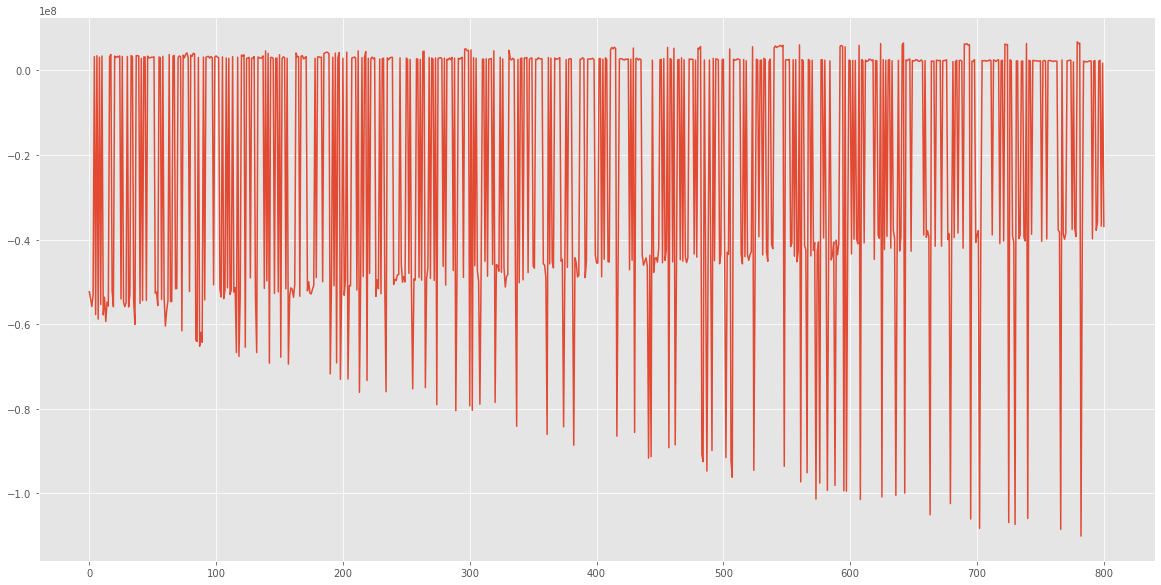

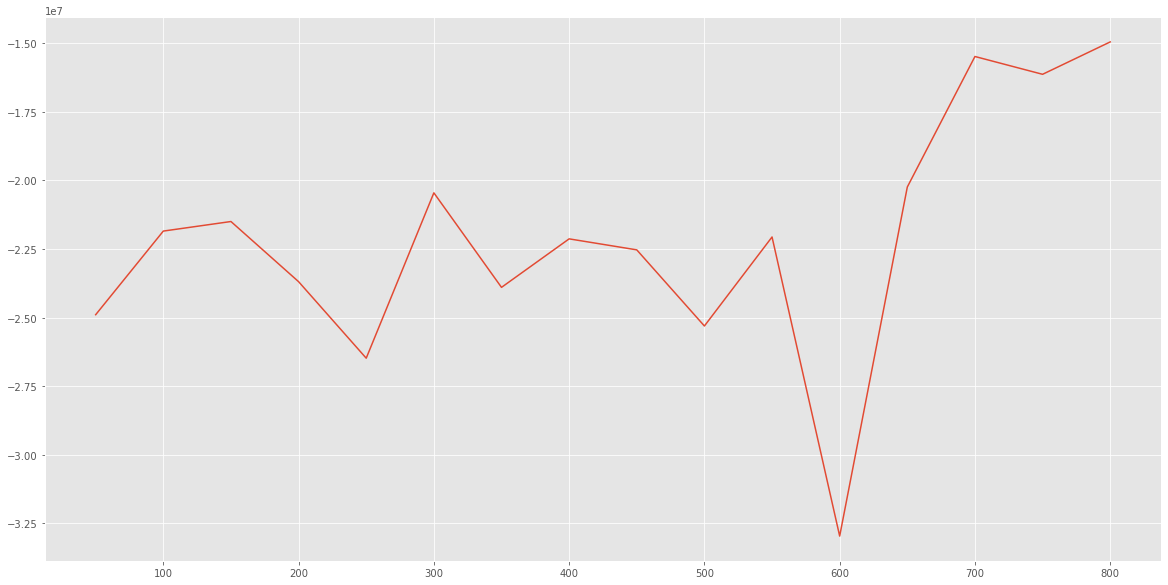

episode: 802/5000, score:6929478.4359999355, e: 0.67 , Win%: 56.71641791044776 %
episode: 803/5000, score:-110799425.66000345, e: 0.67 , Win%: 44.01520726024037 %
episode: 804/5000, score:2119067.965000009, e: 0.67 , Win%: 56.105990783410135 %
episode: 805/5000, score:-35498399.84600033, e: 0.67 , Win%: 43.87245485977718 %
episode: 806/5000, score:2236806.8470000015, e: 0.67 , Win%: 56.14290922347794 %
episode: 807/5000, score:-38429341.87900048, e: 0.67 , Win%: 44.52528192069843 %
episode: 808/5000, score:-112091790.71099643, e: 0.67 , Win%: 40.70364036159296 %
episode: 809/5000, score:-37332650.532000385, e: 0.67 , Win%: 44.2819647544057 %
episode: 810/5000, score:2483661.213000007, e: 0.67 , Win%: 56.93456614509246 %
episode: 811/5000, score:2300381.7800000235, e: 0.67 , Win%: 56.64970930232558 %
episode: 812/5000, score:2128928.211, e: 0.67 , Win%: 55.22548317823908 %
episode: 813/5000, score:-38379269.941999875, e: 0.67 , Win%: 42.836149889786924 %
episode: 814/5000, score:2350508

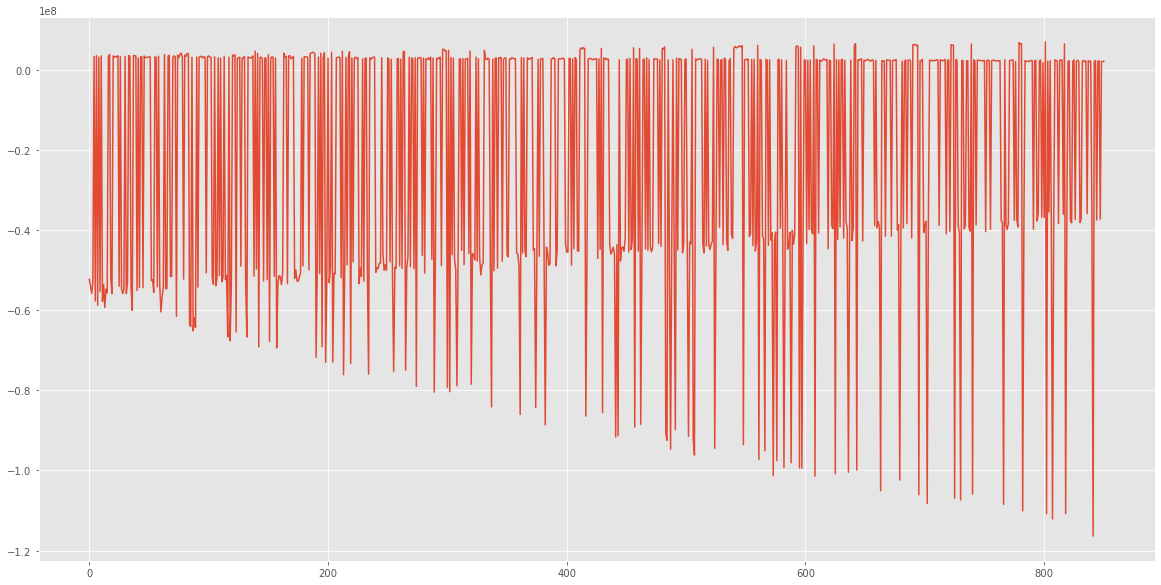

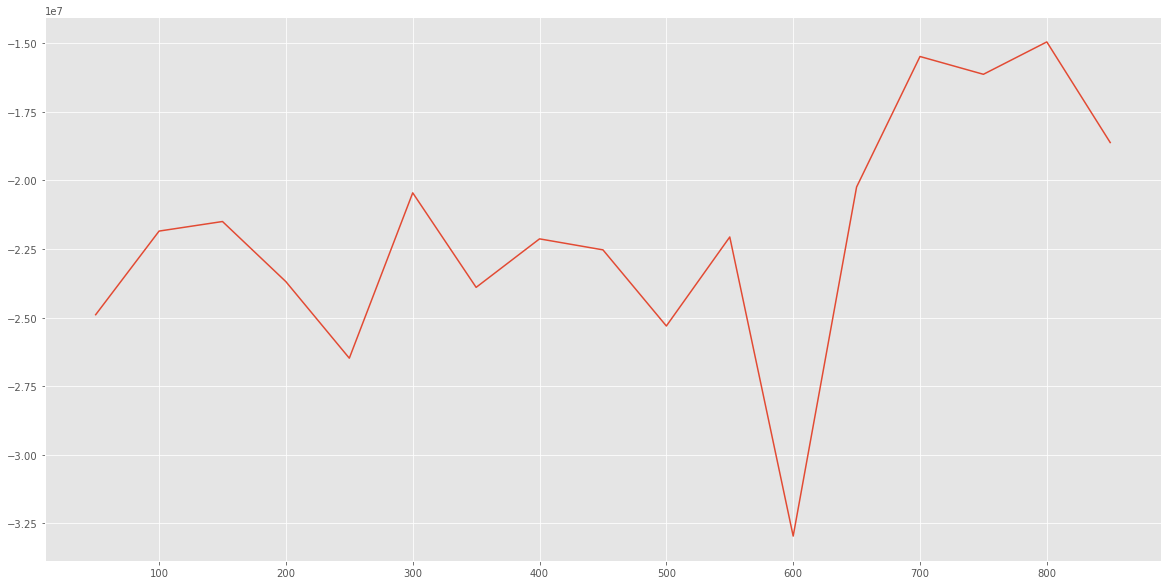

episode: 852/5000, score:2153754.4000000386, e: 0.65 , Win%: 54.843517138599104 %
episode: 853/5000, score:2306311.3990000077, e: 0.65 , Win%: 57.04429920116195 %
episode: 854/5000, score:-36645792.64900051, e: 0.65 , Win%: 43.73831775700935 %
episode: 855/5000, score:2017324.0300000138, e: 0.65 , Win%: 55.86128910667169 %
episode: 856/5000, score:2089479.2440000058, e: 0.65 , Win%: 55.58480631816472 %
episode: 857/5000, score:2288332.6390000107, e: 0.65 , Win%: 56.48393194706994 %
episode: 858/5000, score:1909883.1790000068, e: 0.65 , Win%: 54.59726443768997 %
episode: 859/5000, score:2161930.374000001, e: 0.65 , Win%: 56.9511740588893 %
episode: 860/5000, score:2044171.2329999972, e: 0.65 , Win%: 56.59735349716446 %
episode: 861/5000, score:1899926.8080000074, e: 0.65 , Win%: 54.285714285714285 %
episode: 862/5000, score:2001329.3600000083, e: 0.65 , Win%: 55.96078431372549 %
episode: 863/5000, score:2088860.5520000018, e: 0.65 , Win%: 55.95013222516056 %
episode: 864/5000, score:-35

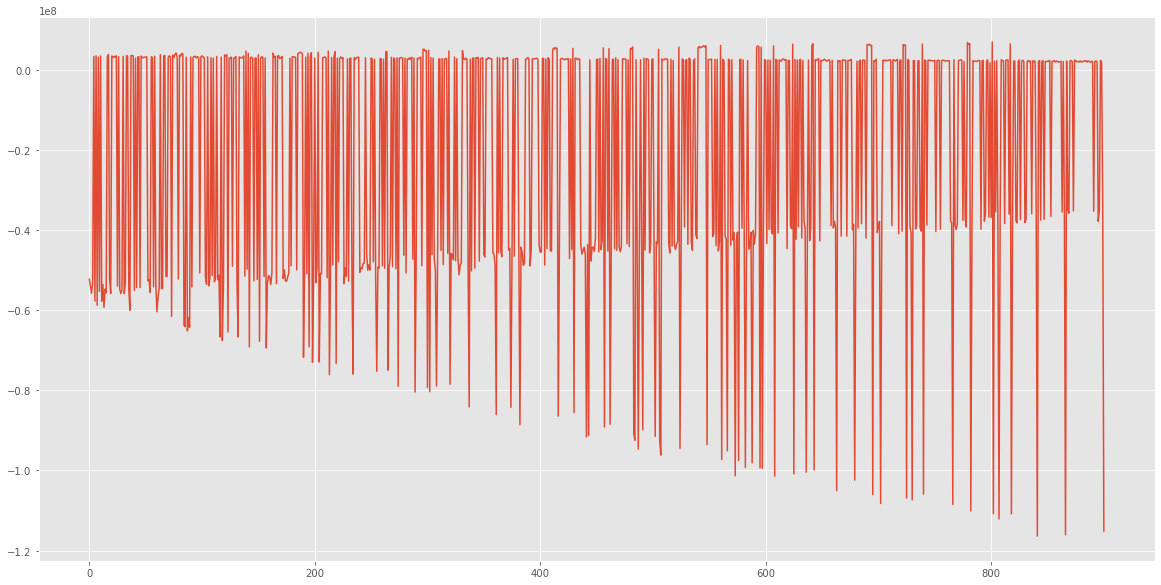

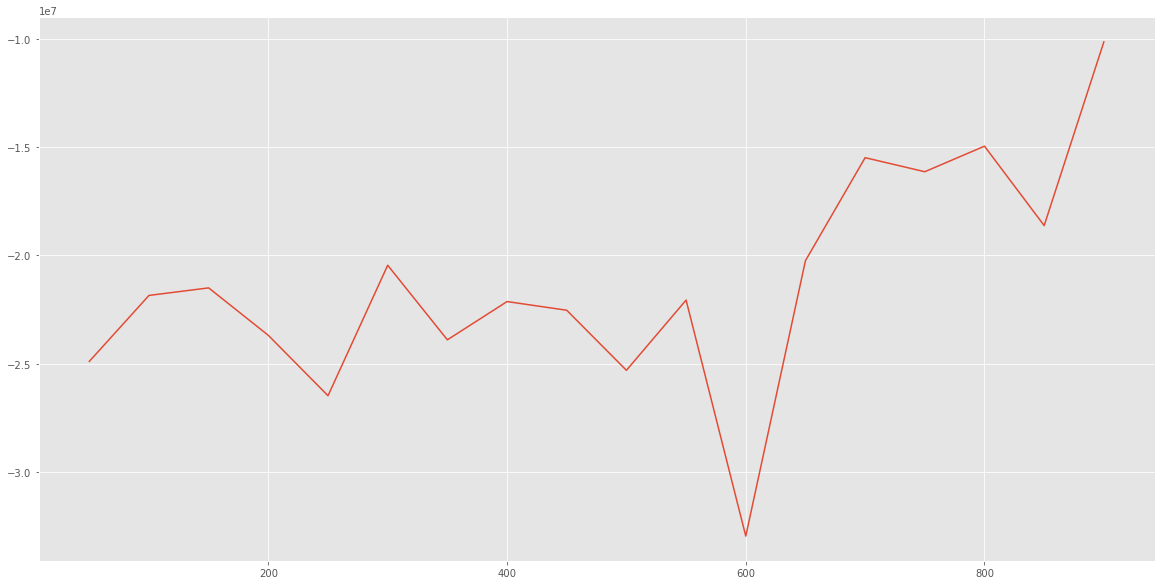

episode: 902/5000, score:2176216.5860000057, e: 0.64 , Win%: 56.624179219775975 %
episode: 903/5000, score:2185173.1200000015, e: 0.64 , Win%: 55.82124656997256 %
episode: 904/5000, score:-35096100.95900025, e: 0.64 , Win%: 44.86547934823797 %
episode: 905/5000, score:2095805.9910000043, e: 0.64 , Win%: 55.84024114544084 %
episode: 906/5000, score:2128463.627000005, e: 0.64 , Win%: 55.14450867052023 %
episode: 907/5000, score:-36446072.306000315, e: 0.64 , Win%: 42.90099769762087 %
episode: 908/5000, score:-34884657.20900037, e: 0.64 , Win%: 44.67005076142132 %
episode: 909/5000, score:-33860568.159000374, e: 0.64 , Win%: 43.423560808234846 %
episode: 910/5000, score:6779669.105999868, e: 0.63 , Win%: 55.885078776645045 %
episode: 911/5000, score:6884153.176000045, e: 0.63 , Win%: 56.191588785046726 %
episode: 912/5000, score:6890459.297999916, e: 0.63 , Win%: 55.944886566100486 %
episode: 913/5000, score:-118829756.61900377, e: 0.63 , Win%: 44.08177488674643 %
episode: 914/5000, score

In [ ]:
output_dir = 'Models'
n_episodes = 5000
Accuracy = []
Epoch = []
epo = []
acc = []
print('Started..!')
for e in range(n_episodes) :
#     state = env.reset()
        reward = 0.0
        done = False
        bid = 0.0
        act = 0
        count = 0
        pre = 0.0
        for i in range(len(X_test)-1):
#             print('Ongoing {} / {}'.format(i,len(X_test)), end = '\r')
            state = X_test[:][i]
            me = X['Close'][i]
            state = np.reshape(state, [1, state_size])
            action = agent.act(state)
            if action == 1 and act == 0:
                bid = me
                act = 1

            elif action == 2 and act == 0:
                bid = me
                act = 2
            elif action == 3 and act != 0: 
                count += 1
                if act == 1: # Buy
                    r = (me - bid )
                    if r <=0:
                        reward += r*10000 -100
                    elif r > 0:
                        reward += r*1000
                        pre +=1
                else: # Sell
                    r = (bid - me)      
                    if r <=0:
                        reward += r*10000 -100
                    elif r > 0:
                        reward += r*1000
                        pre += 1
                act == 0
                bid == 0
            elif action == 0:
                reward += 1
    #         next_state, reward, done, _ = env.step(action) # Must edit
            next_state = X_test[:][i+1]
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state)
    #         state = next_state
        done = True
        if done:
            print("episode: {}/{}, score:{}, e: {:.2} , Win%: {} %".format(e+1,n_episodes, reward, agent.epsilon,(pre*100/count)))
            acc.append(reward)
            epo.append(e)

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
        
        if e % 50 == 0 and e >0:
            Accuracy.append(np.mean(acc[-50:]))
            Epoch.append(e)
            plt.figure(figsize=(20,10))
            plt.plot(epo,acc)
            plt.figure(figsize=(20,10))
            plt.plot(Epoch,Accuracy) 
            plt.show()
        if e % 100 == 0 and e >0:
            agent.save(output_dir + "/model_" + '{:04d}'.format(e) + ".h5")
print('Done...')

In [ ]:
# print('hi', end = '\r')